# GeoSTAD Dataset Exploration

**Dataset:** VoF2025_geokodet.SAV  
**Description:** Norwegian business registry data with geocoded locations

This notebook explores the GeoSTAD dataset containing:
- Organization numbers and names
- Industry codes (SN2025)
- Organization types (orgf2025)  
- Geographic data (postal codes, grid cells, UTM coordinates)

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_theme()

## 2. Load Dataset from Geostad Folder

In [2]:
# Load SPSS file
data_path = Path("../data/raw/population/geostad/VoF2025_geokodet.SAV")
df, meta = pyreadstat.read_sav(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 2,252,561 rows × 31 columns


## 3. Explore Dataset Structure

In [3]:
# Display first few rows
df.head(10)

,navn2025,kar2025,SN2025,SN2025B,SN2025C,sekt2025,sk2025,orgn2025,orgf2025,fadr2025,fadr2025X,fadr2025Y,fpst2025,fpnr2025,sys2025,kom2025,grk2025,N_2025,Etab2025,nedlagt,etablert,epost,treff,X_2025,Y_2025,XTreff,X_2025X,Y_2025X,YTreff,X_2025Y,Y_2025Y
0,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2015.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2015.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOUNDS LIKE NORWAY,,90.020,,,710,2100,999557244,NUF,Ryes gate 12D,Ryes gate 12D,,KONGSBERG,3616,1.0,3303,33030501,1.0,2013.0,NaN,2013.0,,1.0,199000.599174,6.625211e+06,NaN,NaN,NaN,NaN,NaN,NaN
3,GAUSDAL LANDHANDLERI AS,AVD JESSHEIM,46.739,,,710,2100,933735842,AS,Henrik Bulls veg 104,Henrik Bulls veg 104,,JESSHEIM,2052,22.0,3209,32090217,1.0,2013.0,NaN,2013.0,post@gaus.no,1.0,288582.250106,6.673567e+06,NaN,NaN,NaN,NaN,NaN,NaN
4,RAFFINERITOMTA EVJE AS,,68.209,,,710,2100,999666337,AS,Erdvig,Isefjærveien 190,,HØVÅG,4770,0.0,4215,42150105,1.0,2013.0,NaN,2013.0,te@landmaaler.no,4.0,101858.577550,6.467710e+06,NaN,NaN,NaN,NaN,NaN,NaN
5,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2015.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2014.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2018.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2015.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,,,,,,,,,,,,,,,NaN,,,NaN,NaN,2023.0,2013.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")
# Check for duplicate organization numbers
print(f"Duplicate organization numbers: {df['orgn2025'].duplicated().sum()}")
duplicate_orgn = df['orgn2025'][df['orgn2025'].duplicated(keep=False)]
print("Duplicate organization numbers by value count:")
print(duplicate_orgn.value_counts())
# find duplicate in navn2025
print("Duplicate business names:")
duplicate_navn = df['navn2025'][df['navn2025'].duplicated(keep=False)]
print(duplicate_navn.value_counts())

Duplicate rows: 1450749
Duplicate organization numbers: 1518912
Duplicate organization numbers by value count:
orgn2025
             1451030
914791723        586
983044778        403
818066872        360
817209882        354
              ...   
994660187          2
918610618          2
992986565          2
912539075          2
997871537          2
Name: count, Length: 9947, dtype: int64
Duplicate business names:
navn2025
                            1451030
ISS FACILITY SERVICES AS        582
VINMONOPOLET AS                 354
COMPASS GROUP NORGE AS          336
4SERVICE FACILITY AS            289
                             ...   
DHI AS                            2
ALTIDATA AS                       2
LØKEN MARTIN                      2
SAGEN MEDIA                       2
STORØYA SKOLE                     2
Name: count, Length: 13410, dtype: int64


In [ ]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252561 entries, 0 to 2252560
Data columns (total 31 columns):
 #   Column     Dtype  
---  ------     -----  
 0   navn2025   object 
 1   kar2025    object 
 2   SN2025     object 
 3   SN2025B    object 
 4   SN2025C    object 
 5   sekt2025   object 
 6   sk2025     object 
 7   orgn2025   object 
 8   orgf2025   object 
 9   fadr2025   object 
 10  fadr2025X  object 
 11  fadr2025Y  object 
 12  fpst2025   object 
 13  fpnr2025   object 
 14  sys2025    float64
 15  kom2025    object 
 16  grk2025    object 
 17  N_2025     float64
 18  Etab2025   float64
 19  nedlagt    float64
 20  etablert   float64
 21  epost      object 
 22  treff      float64
 23  X_2025     float64
 24  Y_2025     float64
 25  XTreff     float64
 26  X_2025X    float64
 27  Y_2025X    float64
 28  YTreff     float64
 29  X_2025Y    float64
 30  Y_2025Y    float64
dtypes: float64(14), object(17)
memory usage: 532.8+ MB


## 4. Preprocess and Clean dataset

In [5]:
# Select relevant columns as per geostad_info.md
columns_of_interest = [
    "orgn2025",   # Organization number
    "navn2025",   # Business name
    "SN2025",     # Industry code / type of business
    "orgf2025",   # Organization type
    "fpst2025",   # Postal area
    "fpnr2025",   # Postal code
    "grk2025",    # Grid cell number (grunnkrets/BSU sone)
    "X_2025",     # X-coordinate (UTM coordinate system)
    "Y_2025"      # Y-coordinate (UTM coordinate system)
]

# Filter to rows with coordinates and select columns
df_geo = df.dropna(subset="X_2025")[columns_of_interest].copy()
print(f"After filtering for geocoded businesses: {df_geo.shape[0]:,} rows")

After filtering for geocoded businesses: 770,568 rows


## 4. Data Quality Check

In [19]:
# Check for missing values
print("Missing values per column:")
print(df_geo.isnull().sum())
print("\n" + "="*50)

# Check for duplicates
print(f"\nDuplicate rows: {df_geo.duplicated().sum()}")

# Remove duplicates
df_geo = df_geo.drop_duplicates()
print(f"After removing duplicates: {df_geo.shape[0]:,} rows")

Missing values per column:
orgn2025         0
navn2025         0
SN2025           0
orgf2025         0
fpst2025         0
fpnr2025         0
grk2025          0
X_2025           0
Y_2025           0
SN2025_sector    0
dtype: int64


Duplicate rows: 540
After removing duplicates: 770,028 rows


In [23]:
# Check coordinate ranges (should be within Norway's UTM bounds)
print("Coordinate ranges:")
print(f"X_2025: {df_geo['X_2025'].min():,.0f} to {df_geo['X_2025'].max():,.0f}")
print(f"Y_2025: {df_geo['Y_2025'].min():,.0f} to {df_geo['Y_2025'].max():,.0f}")
print("\n" + "="*50)

# Check for outliers using IQR method
Q1_x = df_geo['X_2025'].quantile(0.25)
Q3_x = df_geo['X_2025'].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_geo['Y_2025'].quantile(0.25)
Q3_y = df_geo['Y_2025'].quantile(0.75)
IQR_y = Q3_y - Q1_y

outliers_x = ((df_geo['X_2025'] < Q1_x - 1.5*IQR_x) | (df_geo['X_2025'] > Q3_x + 1.5*IQR_x)).sum()
outliers_y = ((df_geo['Y_2025'] < Q1_y - 1.5*IQR_y) | (df_geo['Y_2025'] > Q3_y + 1.5*IQR_y)).sum()

print(f"\nPotential coordinate outliers:")
print(f"X outliers: {outliers_x}")
print(f"Y outliers: {outliers_y}")

Coordinate ranges:
X_2025: -74,800 to 1,098,272
Y_2025: 6,449,850 to 8,685,966


Potential coordinate outliers:
X outliers: 37142
Y outliers: 73375


In [10]:
# Check cardinality (unique values) for categorical columns
print("Unique value counts:")
print(f"Organization numbers: {df_geo['orgn2025'].nunique():,}")
print(f"Business names: {df_geo['navn2025'].nunique():,}")
print(f"Organization types: {df_geo['orgf2025'].nunique()}")
print(f"Industry codes: {df_geo['SN2025'].nunique()}")
print(f"Postal codes: {df_geo['fpnr2025'].nunique()}")
print(f"BSU: {df_geo['grk2025'].nunique():,}")

Unique value counts:
Organization numbers: 705,708
Business names: 730,881
Organization types: 34
Industry codes: 800
Postal codes: 3815
BSU: 13,599


In [11]:
# Check for invalid/unusual organization numbers (should be 9 digits)
df_geo['orgn_length'] = df_geo['orgn2025'].astype(str).str.len()
print("\nOrganization number length distribution:")
print(df_geo['orgn_length'].value_counts().sort_index())

invalid_orgn = df_geo[df_geo['orgn_length'] != 9.0]
print(f"\nInvalid organization numbers (not 9 digits): {len(invalid_orgn)}")

# Clean up temporary column
df_geo.drop('orgn_length', axis=1, inplace=True)


Organization number length distribution:
orgn_length
9    770568
Name: count, dtype: int64

Invalid organization numbers (not 9 digits): 0


## 5. Basic Statistical Analysis

In [12]:
# Top organization types
print("Top 10 organization types:")
print(df_geo['orgf2025'].value_counts().head(10))
print("\n" + "="*50)

# Top industry codes (
df_geo['SN2025_sector'] = df_geo['SN2025'].astype(str)
print("\nTop 10 industry sectors (first 2 digits of SN2025):")
print(df_geo['SN2025_sector'].value_counts().head(10))

Top 10 organization types:
orgf2025
AS      333282
ENK     286385
FLI      47224
ESEK     29557
ORGL     17100
BRL       9053
KOMM      8139
KBO       7378
SA        6014
DA        5227
Name: count, dtype: int64


Top 10 industry sectors (first 2 digits of SN2025):
SN2025_sector
68.209    56376
68.201    27541
94.991    25501
41.200    19752
70.220    18817
          14616
97.000    14099
90.011    13772
64.302    12844
86.211    11935
Name: count, dtype: int64


## 6. Data Visualization

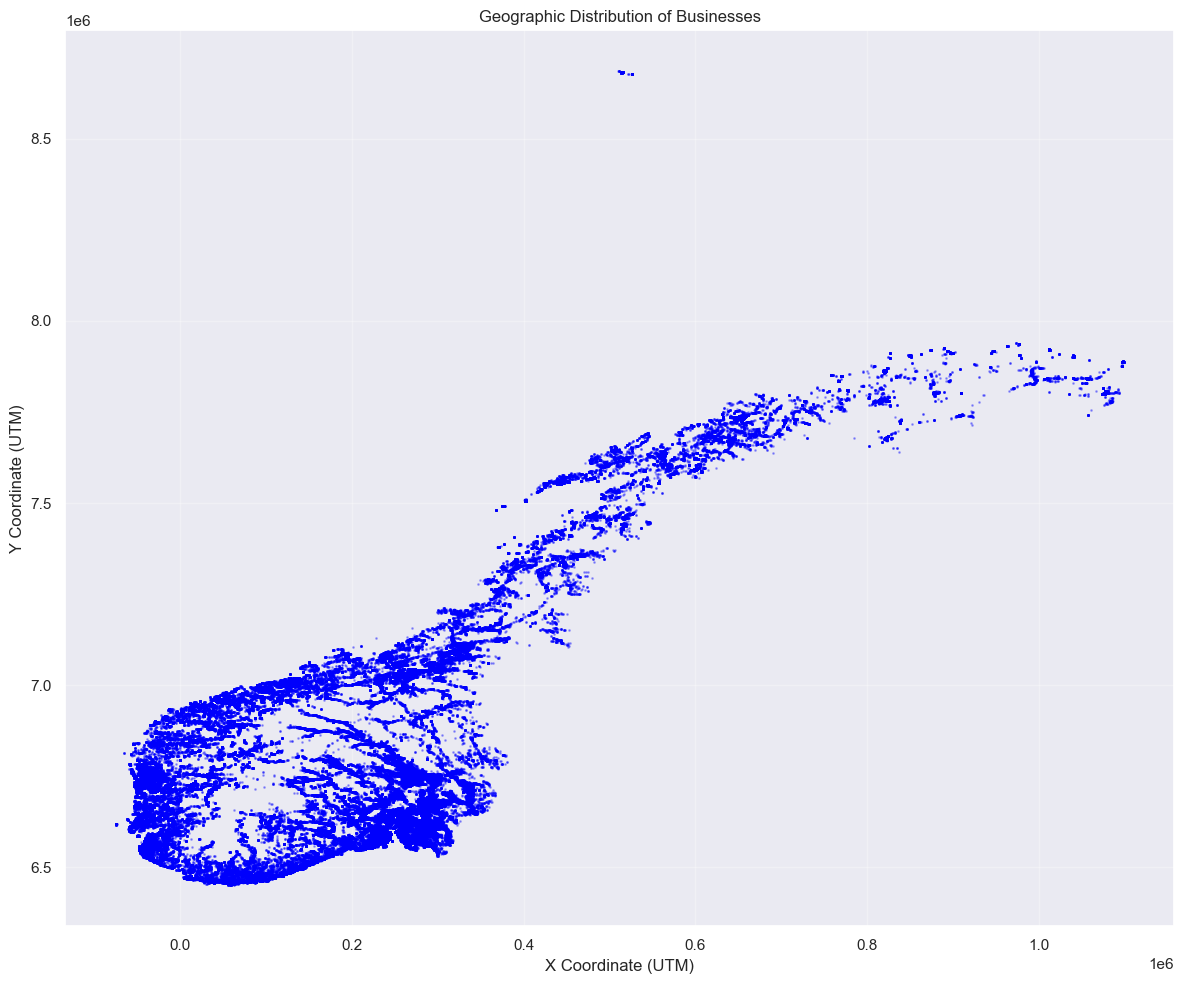

In [18]:
# Geographic distribution scatter plot
fig, ax = plt.subplots(figsize=(12, 10))

# Sample data if too large (for faster plotting)
# sample_size = min(10000, len(df_geo))
# df_sample = df_geo.sample(n=sample_size, random_state=42)

ax.scatter(df_geo['X_2025'], df_geo['Y_2025'], 
           alpha=0.3, s=1, c='blue')
ax.set_xlabel('X Coordinate (UTM)')
ax.set_ylabel('Y Coordinate (UTM)')
ax.set_title(f'Geographic Distribution of Businesses')# (n={sample_size:,})')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

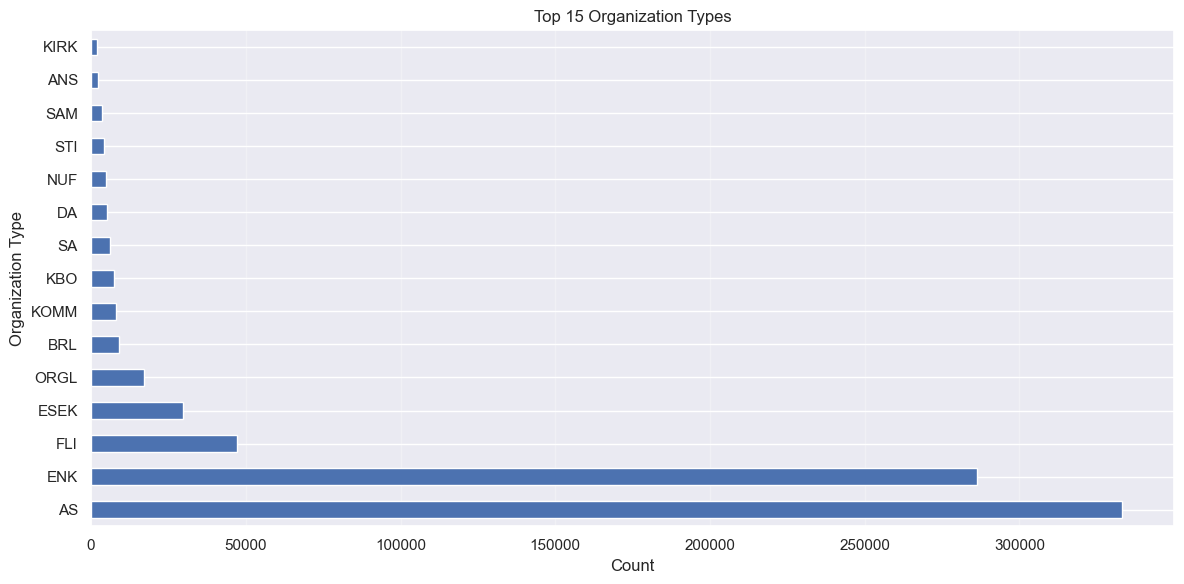

In [12]:
# Top organization types bar chart
fig, ax = plt.subplots(figsize=(12, 6))
df_geo['orgf2025'].value_counts().head(15).plot(kind='barh', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Organization Type')
ax.set_title('Top 15 Organization Types')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()